In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('IBM2017.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-17,25.139999,25.139999,25.139999,25.139999,23.982637,0
1,2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0
2,2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000
3,2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300
4,2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0
...,...,...,...,...,...,...,...
741,2020-03-26,25.280001,25.670000,25.280001,25.660000,25.624987,44800
742,2020-03-27,25.520000,25.719999,25.520000,25.559999,25.525122,32000
743,2020-03-30,25.440001,25.719999,25.440001,25.650000,25.615000,64400
744,2020-03-31,25.700001,25.700001,25.490000,25.650000,25.615000,129100


> Data Preprocessing

In [4]:
# Converting Date Column to DateTime format with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-17,25.139999,25.139999,25.139999,25.139999,23.982637,0
1,2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0
2,2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000
3,2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300
4,2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0


In [5]:
# Setting Datatime as Index
dt = df.set_index('Date').rename_axis(None)
dt

,Open,High,Low,Close,Adj Close,Volume
2017-04-17,25.139999,25.139999,25.139999,25.139999,23.982637,0
2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0
2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000
2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300
2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0
...,...,...,...,...,...,...
2020-03-26,25.280001,25.670000,25.280001,25.660000,25.624987,44800
2020-03-27,25.520000,25.719999,25.520000,25.559999,25.525122,32000
2020-03-30,25.440001,25.719999,25.440001,25.650000,25.615000,64400
2020-03-31,25.700001,25.700001,25.490000,25.650000,25.615000,129100


In [6]:
# Calculating log returns (Log Transformation)
import numpy as np

dt['Log_Returns'] = np.log(dt['Adj Close'] / dt['Adj Close'].shift(1))
dt.dropna(inplace=True)

In [7]:
dt

,Open,High,Low,Close,Adj Close,Volume,Log_Returns
2017-04-18,25.139999,25.139999,25.139999,25.139999,23.982637,0,0.000000
2017-04-19,25.250000,25.250000,25.250000,25.250000,24.087582,2000,0.004366
2017-04-20,25.240000,25.240000,25.240000,25.240000,24.078035,6300,-0.000396
2017-04-21,25.240000,25.240000,25.240000,25.240000,24.078035,0,0.000000
2017-04-24,25.209999,25.230000,25.174000,25.174000,24.015074,3000,-0.002618
...,...,...,...,...,...,...,...
2020-03-26,25.280001,25.670000,25.280001,25.660000,25.624987,44800,0.024459
2020-03-27,25.520000,25.719999,25.520000,25.559999,25.525122,32000,-0.003905
2020-03-30,25.440001,25.719999,25.440001,25.650000,25.615000,64400,0.003515
2020-03-31,25.700001,25.700001,25.490000,25.650000,25.615000,129100,0.000000


In [8]:
# Splitting data into training and test sets
train_size = int(len(dt) * 0.8)
train, test = dt['Log_Returns'][:train_size], dt['Log_Returns'][train_size:]

> Building Model

In [10]:
pip install arch==7.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 984.3/984.3 kB 27.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
from arch import arch_model

# Initializing Model
model = arch_model(train, vol='Garch', p=8, q=1)

# Fitting Model
garch_fit = model.fit(disp='off')

# Model Summary
garch_fit.summary()

/usr/local/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3067.02
Distribution:                  Normal   AIC:                          -6112.03
Method:            Maximum Likelihood   BIC:                          -6063.74
                                        No. Observations:                  596
Date:                Mon, Aug 19 2024   Df Residuals:                      595
Time:                        09:47:41   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.1508e-04  4.118e-07    279.467      0.000 [1.143e-04,1.159e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.2162e-08  7.878e-11    535.166      0.000 [4.201e-08,4.232e-08]
alpha[1]   6.2500e-03      0.205  3.049e-02      0.976     [ -0.396,  0.408]
alpha[2]   6.2500e-03      0.178  3.507e-02      0.972     [ -0.343,  0.356]
alpha[3]   6.2500e-03  4.883e-02      0.128      0.898  [-8.945e-02,  0.102]
alpha[4]   6.2500e-03  6.335e-02  9.866e-02      0.921     [ -0.118,  0.130]
alpha[5]   6.2500e-03      0.111  5.626e-02      0.955     [ -0.211,  0.224]
alpha[6]   6.2500e-03      0.100  6.227e-02      0.950     [ -0.190,  0.203]
alpha[7]   6.2500e-03      0.729  8.569e-03      0.993     [ -1.423,  1.436]
alpha[8]   6.2500e-03      0.686  9.110e-03      0.993     [ -1.338,  1.351]
beta[1]        0.9300  1.571e-02     59.179      0.000     [  0.899,  0.961]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Inequality constraints incompatible.
See convergence_flag.

"""

> Making Predictions

In [12]:
# Forecasting Volatility
forecast_horizon = int(len(test))
garch_forecast = garch_fit.forecast(
    horizon= forecast_horizon
)

# Extracting the forecasted volatitlity (standard deviation)
predicted_volatitlity = np.sqrt(garch_forecast.variance.values[-1, :])

> Evaluating Model

In [13]:
# Calculating mean squared error of the forcasted volatitlity
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test.values, predicted_volatitlity)
print(f'Mean Squared Error of Garch Model: {mse}')

Mean Squared Error of Garch Model: 2.240627804276428e-05


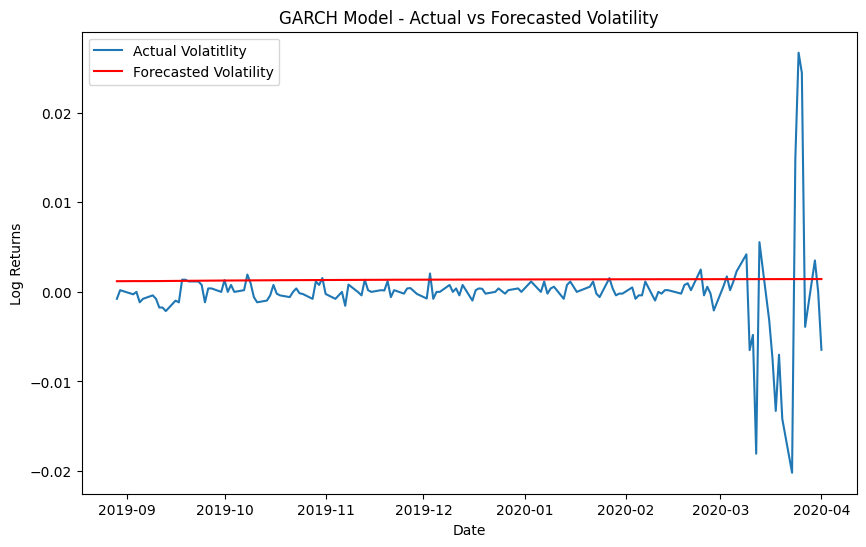

In [14]:
# Plotting the actual vs forecasted volatility
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label = 'Actual Volatitlity')
plt.plot(test.index, predicted_volatitlity, label = 'Forecasted Volatility', color='red')
plt.title('GARCH Model - Actual vs Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

> Hyperparameter Tuning

In [16]:
# Initializing a list to store the results
results = []

# Grid Search
for p in range(1, 10):
    for q in range(1, 10):
        try:
            # Fitting Model
            model = arch_model(train, vol='Garch', p=p, q=q)
            garch_fit = model.fit(disp='off')
            aic = garch_fit.aic
            bic = garch_fit.bic

            # Forecasting
            forecast_horizon = int(len(test))
            garch_forecast = garch_fit.forecast(horizon= forecast_horizon)

            # Extracting the forecasted volatitlity (standard deviation)
            predicted_volatitlity = np.sqrt(garch_forecast.variance.values[-1, :])
            
            # Calculating mse
            mse = mean_squared_error(test.values, predicted_volatitlity)

            # Saving results
            results.append((p, q, aic, bic, mse))
        except:
            continue

# Converting results to DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=['p', 'q', 'AIC', 'BIC', 'MSE'])

/usr/local/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.9/site-packages/arch/univaria

In [17]:
best_aic = results_df.loc[results_df['AIC'].idxmin()]
best_bic = results_df.loc[results_df['BIC'].idxmin()]

# print(f'Best p, q based on AIC: \nP = {best_aic.p} \nQ = {best_aic.q} \nAIC = {best_aic.AIC}')
# print(f'\nBest p, q based on BIC: \nP = {best_bic.p} \nQ = {best_bic.q} \nAIC = {best_bic.AIC}')

if best_aic.MSE < best_bic.MSE:
    print(f'Best overall parameter based on least MSE between AIC and BIC: \n{best_aic}')
    best_param = best_aic
else:
    print(f'Best overall parameter based on least MSE between AIC and BIC: \n{best_bic}')
    best_param = best_bic

Best overall parameter based on least MSE between AIC and BIC: 
p         1.000000
q         1.000000
AIC   -6123.698508
BIC   -6106.137545
MSE       0.000022
Name: 0, dtype: float64


> The hyperparameter tuning process identified the best parameters for the GARCH model using gridh search. The models with the lowest AIC and BIC were evaluated and compared based on their mean squared error (MSE).


> Training Model based on best parameters

In [18]:
# Fitting model
best_model = arch_model(dt['Log_Returns'], vol='Garch', p=int(best_param.p), q=int(best_param.q))
best_garch_fit = best_model.fit(disp='off')

# Forecasting values
forecast_horizon = 90
garch_forecast = best_garch_fit.forecast(horizon=forecast_horizon)

# Extracting the forecasted volatitlity (standard deviation)
predicted_volatitlity = np.sqrt(garch_forecast.variance.values[-1, :])

/usr/local/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


> Plotting Forecast

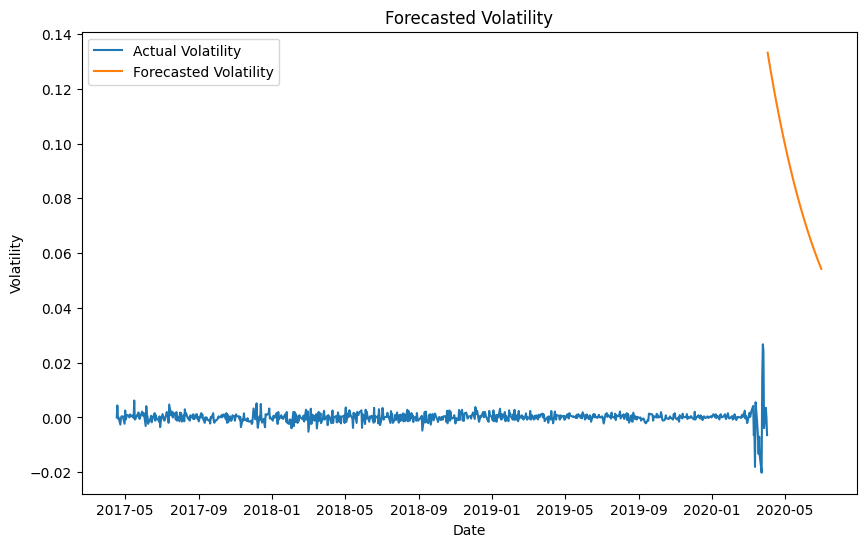

In [19]:
# Plotting forecast

forecast_ind = pd.date_range(
    start= dt.index[-1] + pd.Timedelta(days=1),
    periods=forecast_horizon,
    freq='D'
)

plt.figure(figsize=(10, 6))
plt.plot(dt.index, dt['Log_Returns'], label='Actual Volatility')
plt.plot(forecast_ind, predicted_volatitlity, label='Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Forecasted Volatility')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ccbe74-5722-4f84-8e54-7da9a834c88a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>